Link To Data: https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis

Topic: Home ownership status prediction
My goal for this dataset is to develop a predictive model for the homeownership status of individuals based on multiple demographic factors. This will help form a better understanding of what key demographics influence whether someone is renting or own their home. The dataset includes multiple factors for consideration age, education level, occupation, number of dependents, location, work experience, marital status, employment status, household size, type of housing, gender, primary mode of transportation, and income. My target variable for this project is Homeownership Status, which indicates whether an individual owns or rents their home. Homeownership Status  is a categorical variable with two possible values own or rent. Analyzing this variable will give the number of individuals who own versus rent their homes. The primary goal is to accurately classify individuals into "Own" or "Rent" categories based on the other features.



In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [44]:
#Printing shape, data types, and first 10 rows of data.
print("shape", df.shape)
print(df.dtypes)
print(df.head(10))

shape (10000, 14)
Age                                int64
Education_Level                   object
Occupation                        object
Number_of_Dependents               int64
Location                          object
Work_Experience                    int64
Marital_Status                    object
Employment_Status                 object
Household_Size                     int64
Homeownership_Status              object
Type_of_Housing                   object
Gender                            object
Primary_Mode_of_Transportation    object
Income                             int64
dtype: object
   Age Education_Level  Occupation  Number_of_Dependents  Location  \
0   56        Master's  Technology                     5     Urban   
1   69     High School     Finance                     0     Urban   
2   46      Bachelor's  Technology                     1     Urban   
3   32     High School      Others                     2     Urban   
4   60      Bachelor's     Finance          

In [45]:
# Check for null values
print(df.isnull().sum())

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64


In [46]:
#Checking for duplicated rows
print(df.duplicated().sum())

0


In [47]:
#Printing unique values for each column
for col in df.columns:
  print(col, df[col].unique())

Age [56 69 46 32 60 25 38 36 40 28 41 70 53 57 20 39 19 61 47 55 50 29 42 66
 44 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58
 18 22 30 49 63]
Education_Level ["Master's" 'High School' "Bachelor's" 'Doctorate']
Occupation ['Technology' 'Finance' 'Others' 'Education' 'Healthcare']
Number_of_Dependents [5 0 1 2 3 4]
Location ['Urban' 'Rural' 'Suburban']
Work_Experience [21  4  1 32 15  6 20 34 45 50 47  5 38 42 24 17 40 23 39 22 28  9 14 25
 33 30  8 26 29  3 46 19 44  0  2 16 31  7 43 27 18 41 13 36 37 10 35 12
 48 49 11]
Marital_Status ['Married' 'Single' 'Divorced']
Employment_Status ['Full-time' 'Self-employed' 'Part-time']
Household_Size [7 1 4 2 6 5 3]
Homeownership_Status ['Own' 'Rent']
Type_of_Housing ['Apartment' 'Single-family home' 'Townhouse']
Gender ['Male' 'Female']
Primary_Mode_of_Transportation ['Public transit' 'Biking' 'Car' 'Walking']
Income [  72510   75462   71748 ... 2684820   57955 1131084]


In [48]:
#Changing categorical variables to numerical
education_mapping = {"Master's": 0, "Bachelor's": 1, "High School": 2, 'Doctorate': 3}
occupation_mapping = {'Technology': 0, 'Finance': 1, 'Education': 2, 'Healthcare': 3, 'Others': 4}
location_mapping = {'Urban': 0, 'Rural': 1, 'Suburban': 2}
marital_status_mapping = {'Married': 0, 'Single': 1, 'Divorced': 2}
employment_status_mapping = {'Full-time': 0, 'Self-employed': 1, 'Part-time': 2}
housing_mapping = {'Apartment': 0, 'Single-family home': 1, 'Townhouse': 2}
transportation_mapping = {'Car': 0, 'Public transit': 1, 'Walking': 2, 'Biking': 3}
homeownership_mapping = {'Rent': 0, 'Own': 1}

df['Education_Level'] = df['Education_Level'].map(education_mapping)
df['Occupation'] = df['Occupation'].map(occupation_mapping)
df['Location'] = df['Location'].map(location_mapping)
df['Marital_Status'] = df['Marital_Status'].map(marital_status_mapping)
df['Employment_Status'] = df['Employment_Status'].map(employment_status_mapping)
df['Type_of_Housing'] = df['Type_of_Housing'].map(housing_mapping)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Primary_Mode_of_Transportation'] = df['Primary_Mode_of_Transportation'].map(transportation_mapping)
df['Homeownership_Status'] = df['Homeownership_Status'].map(homeownership_mapping)

In [49]:
#Checking for null values after changing categorical to numerical. This helps double check my mapping
print(df.isnull().sum())

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64


In [50]:
#Changing 'Homeownership_Status' to targert since it is target variable
df.rename(columns={'Homeownership_Status': 'target'}, inplace=True)

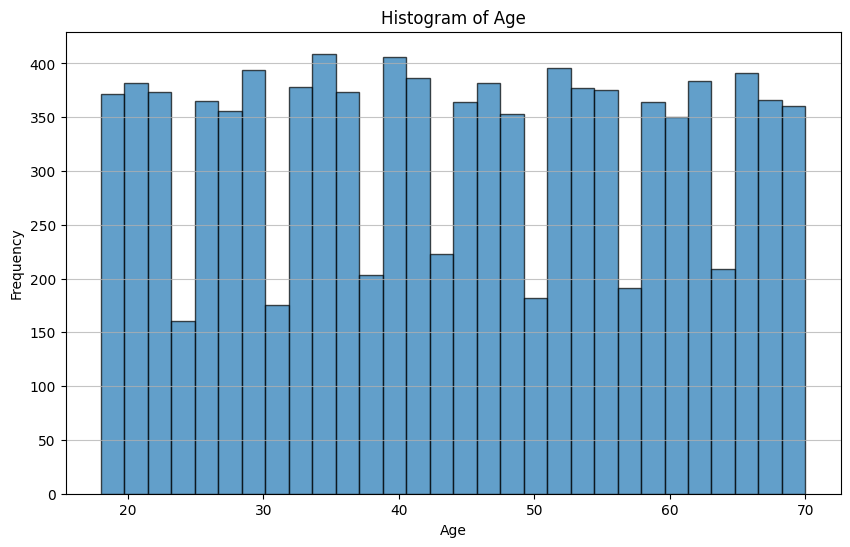

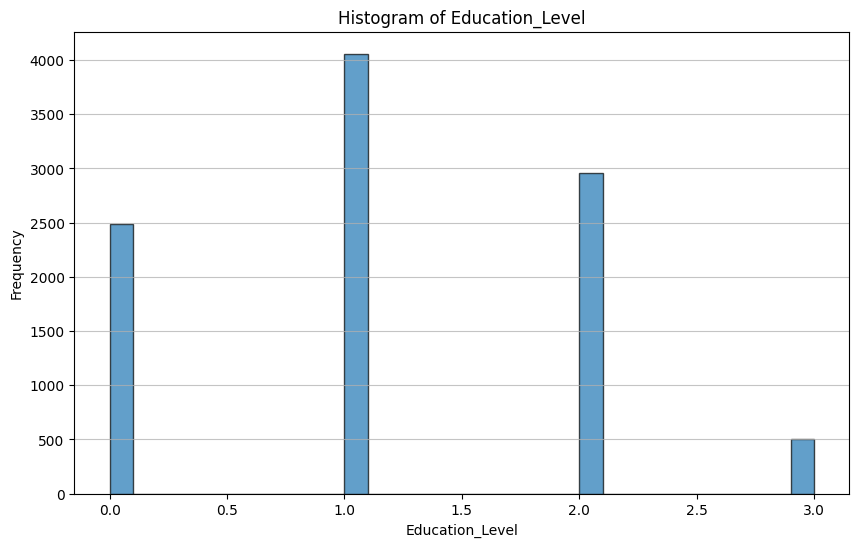

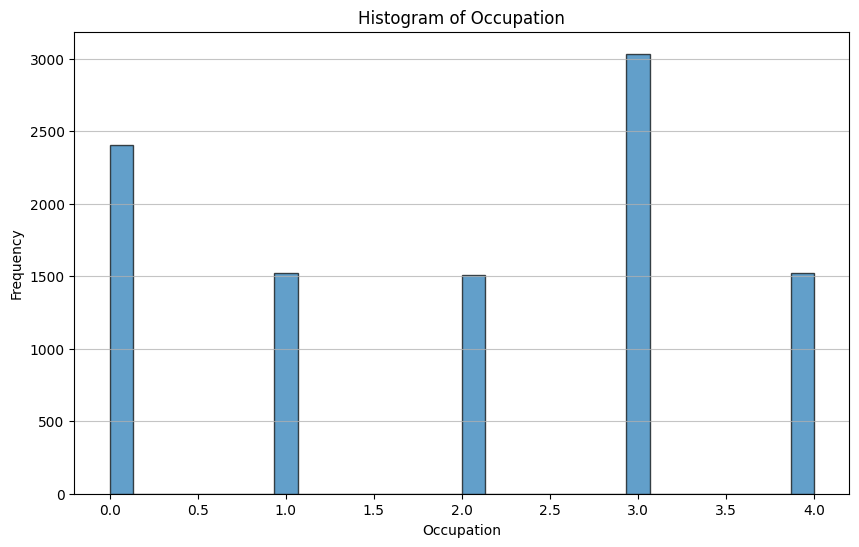

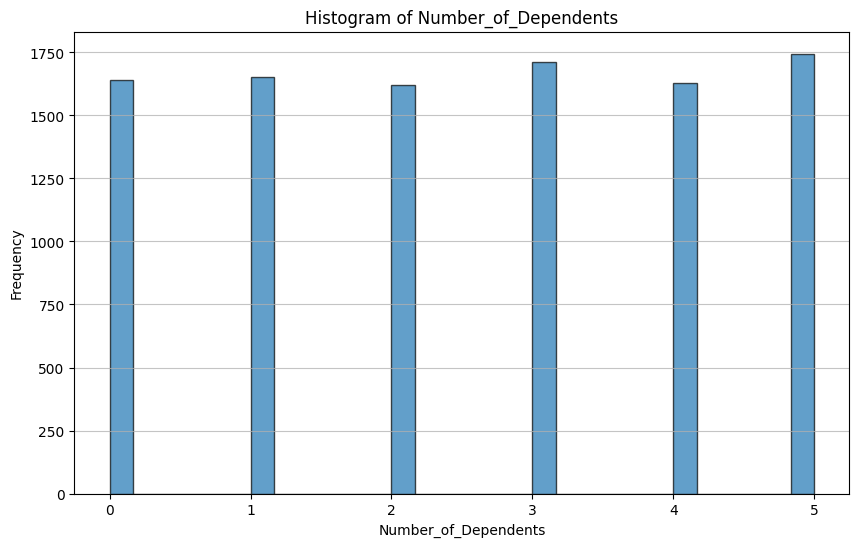

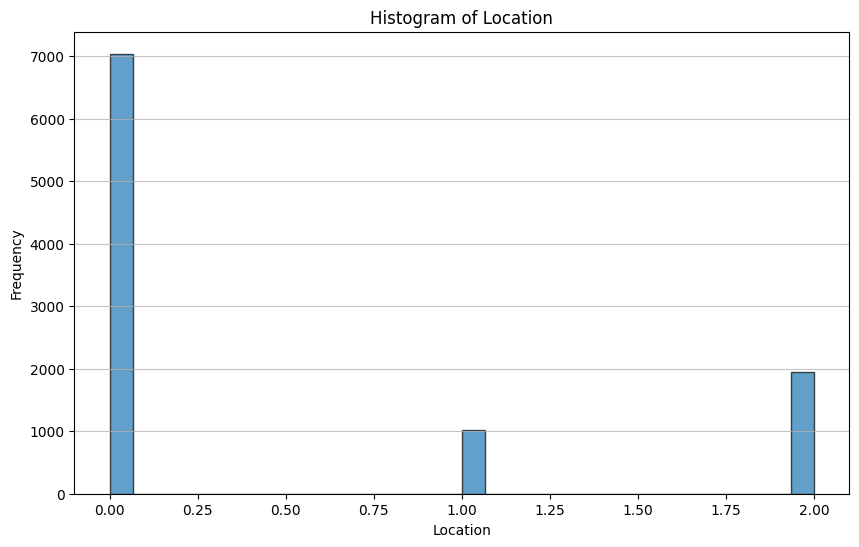

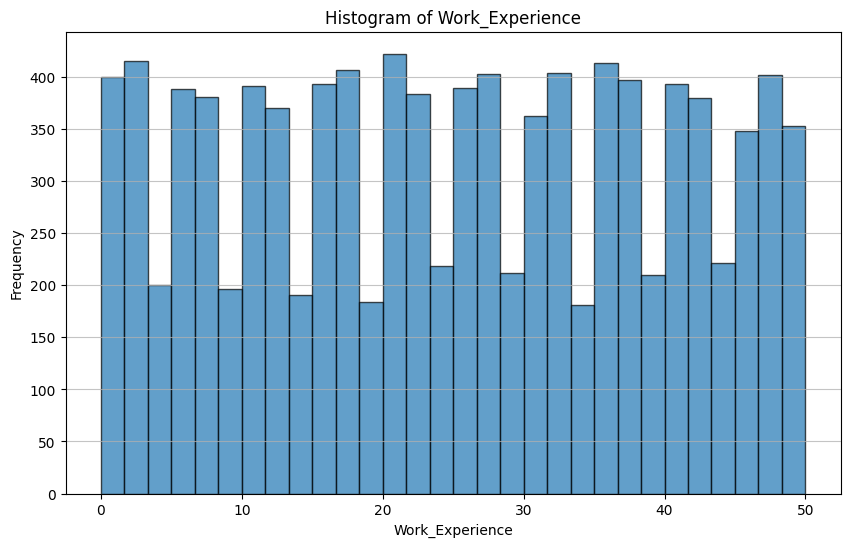

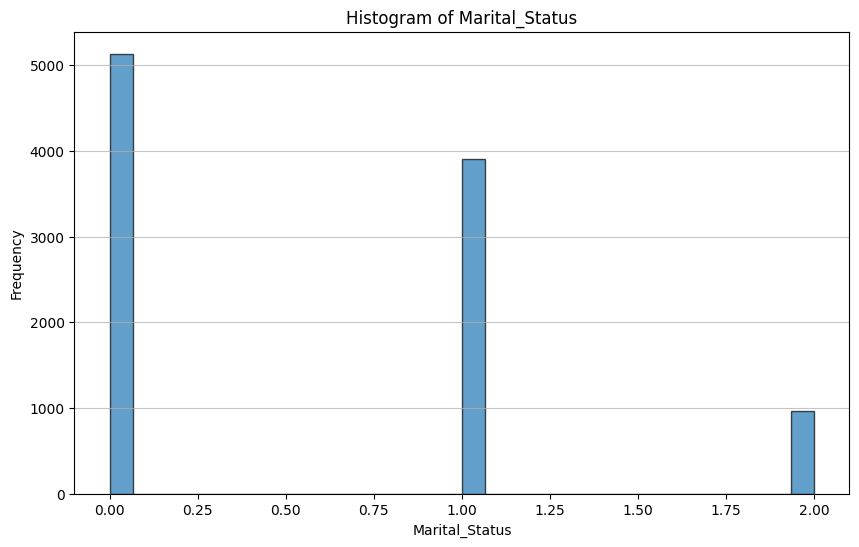

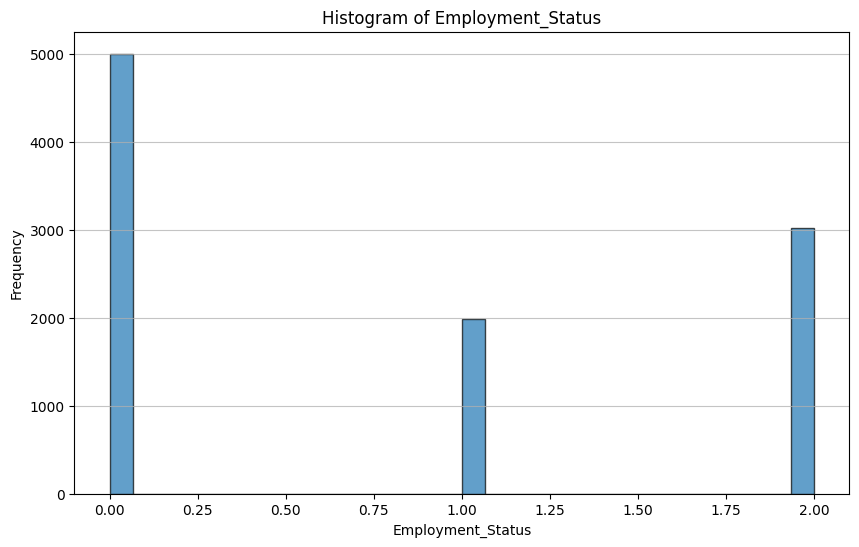

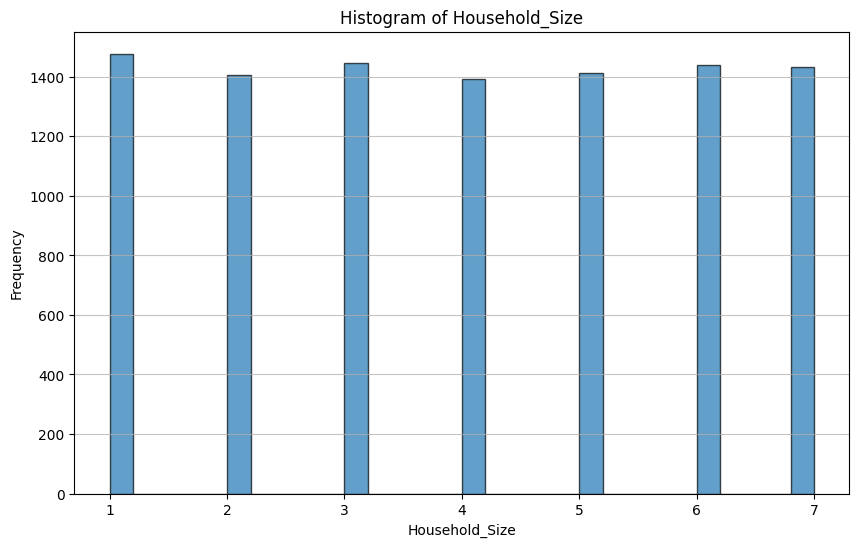

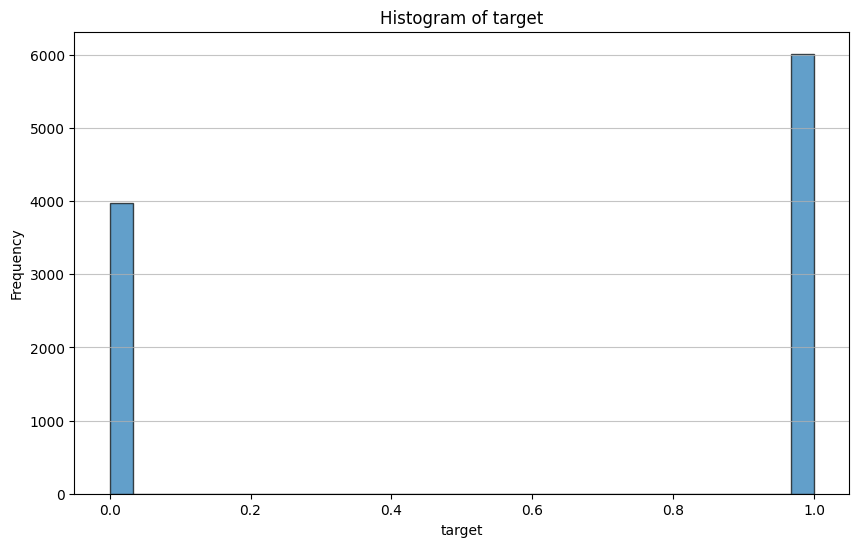

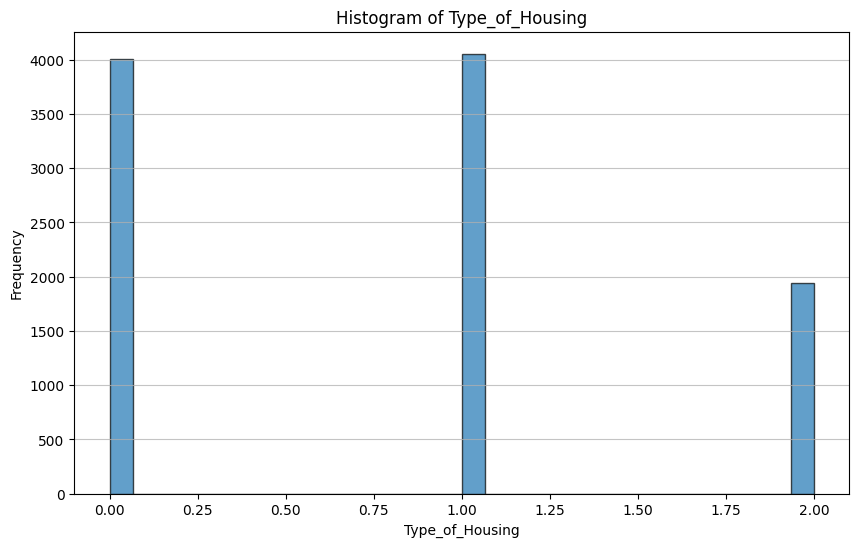

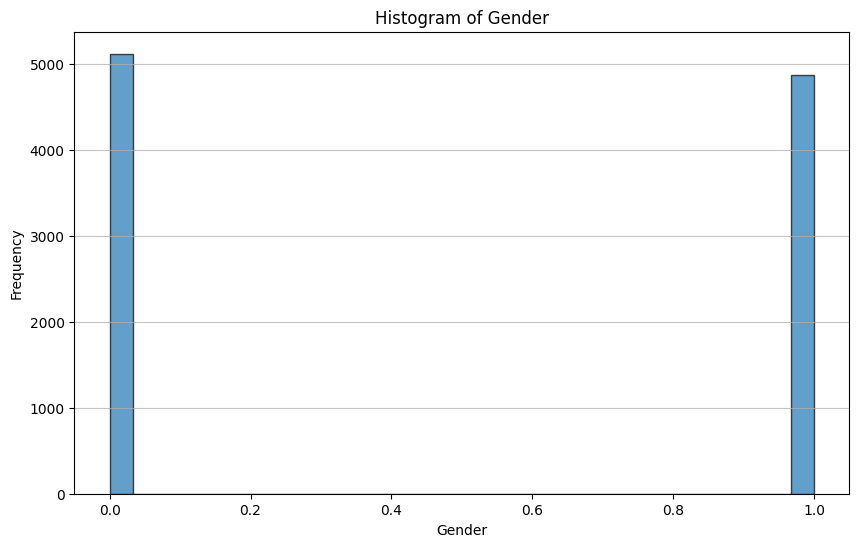

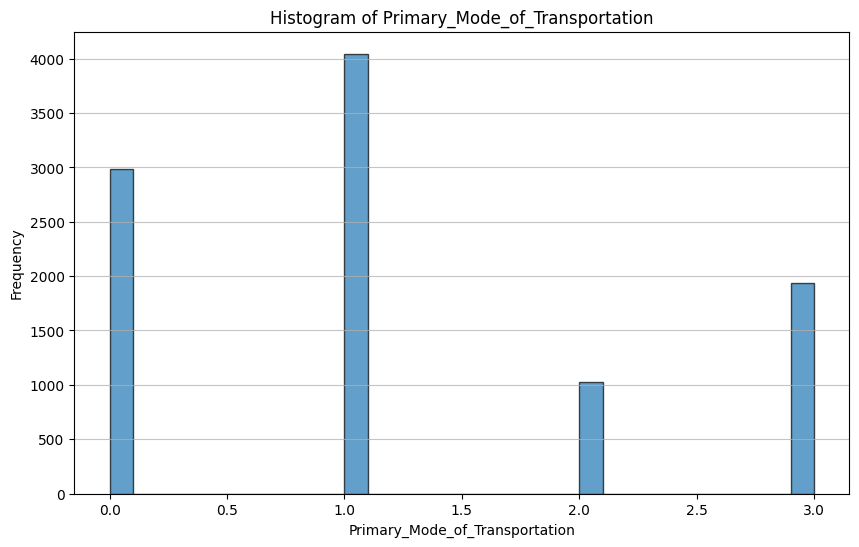

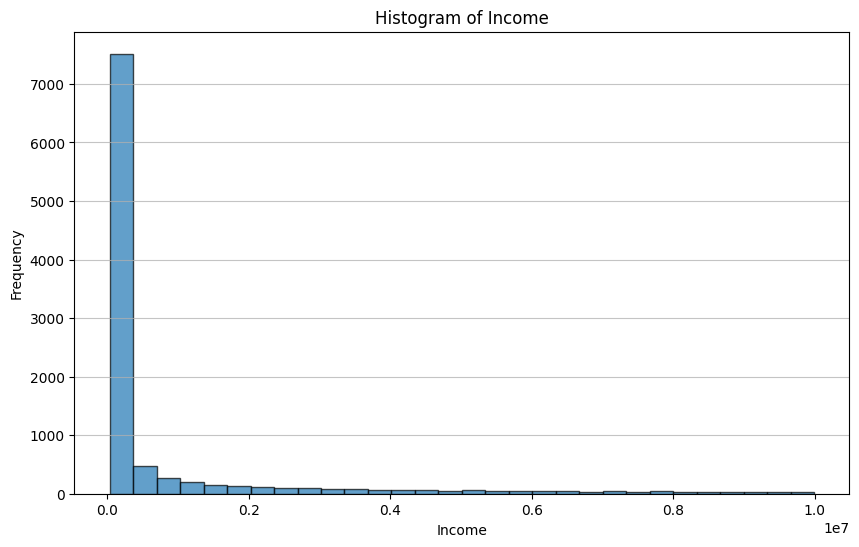

In [52]:
numeric_columns = ['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'target', 'Type_of_Housing','Gender',
       'Primary_Mode_of_Transportation', 'Income']

# Create histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

Based on these histograms, I don't see any outliers in my data. They have noticable highs and lows, but I don't see anything that falls in the arrange of what would be an outlier.

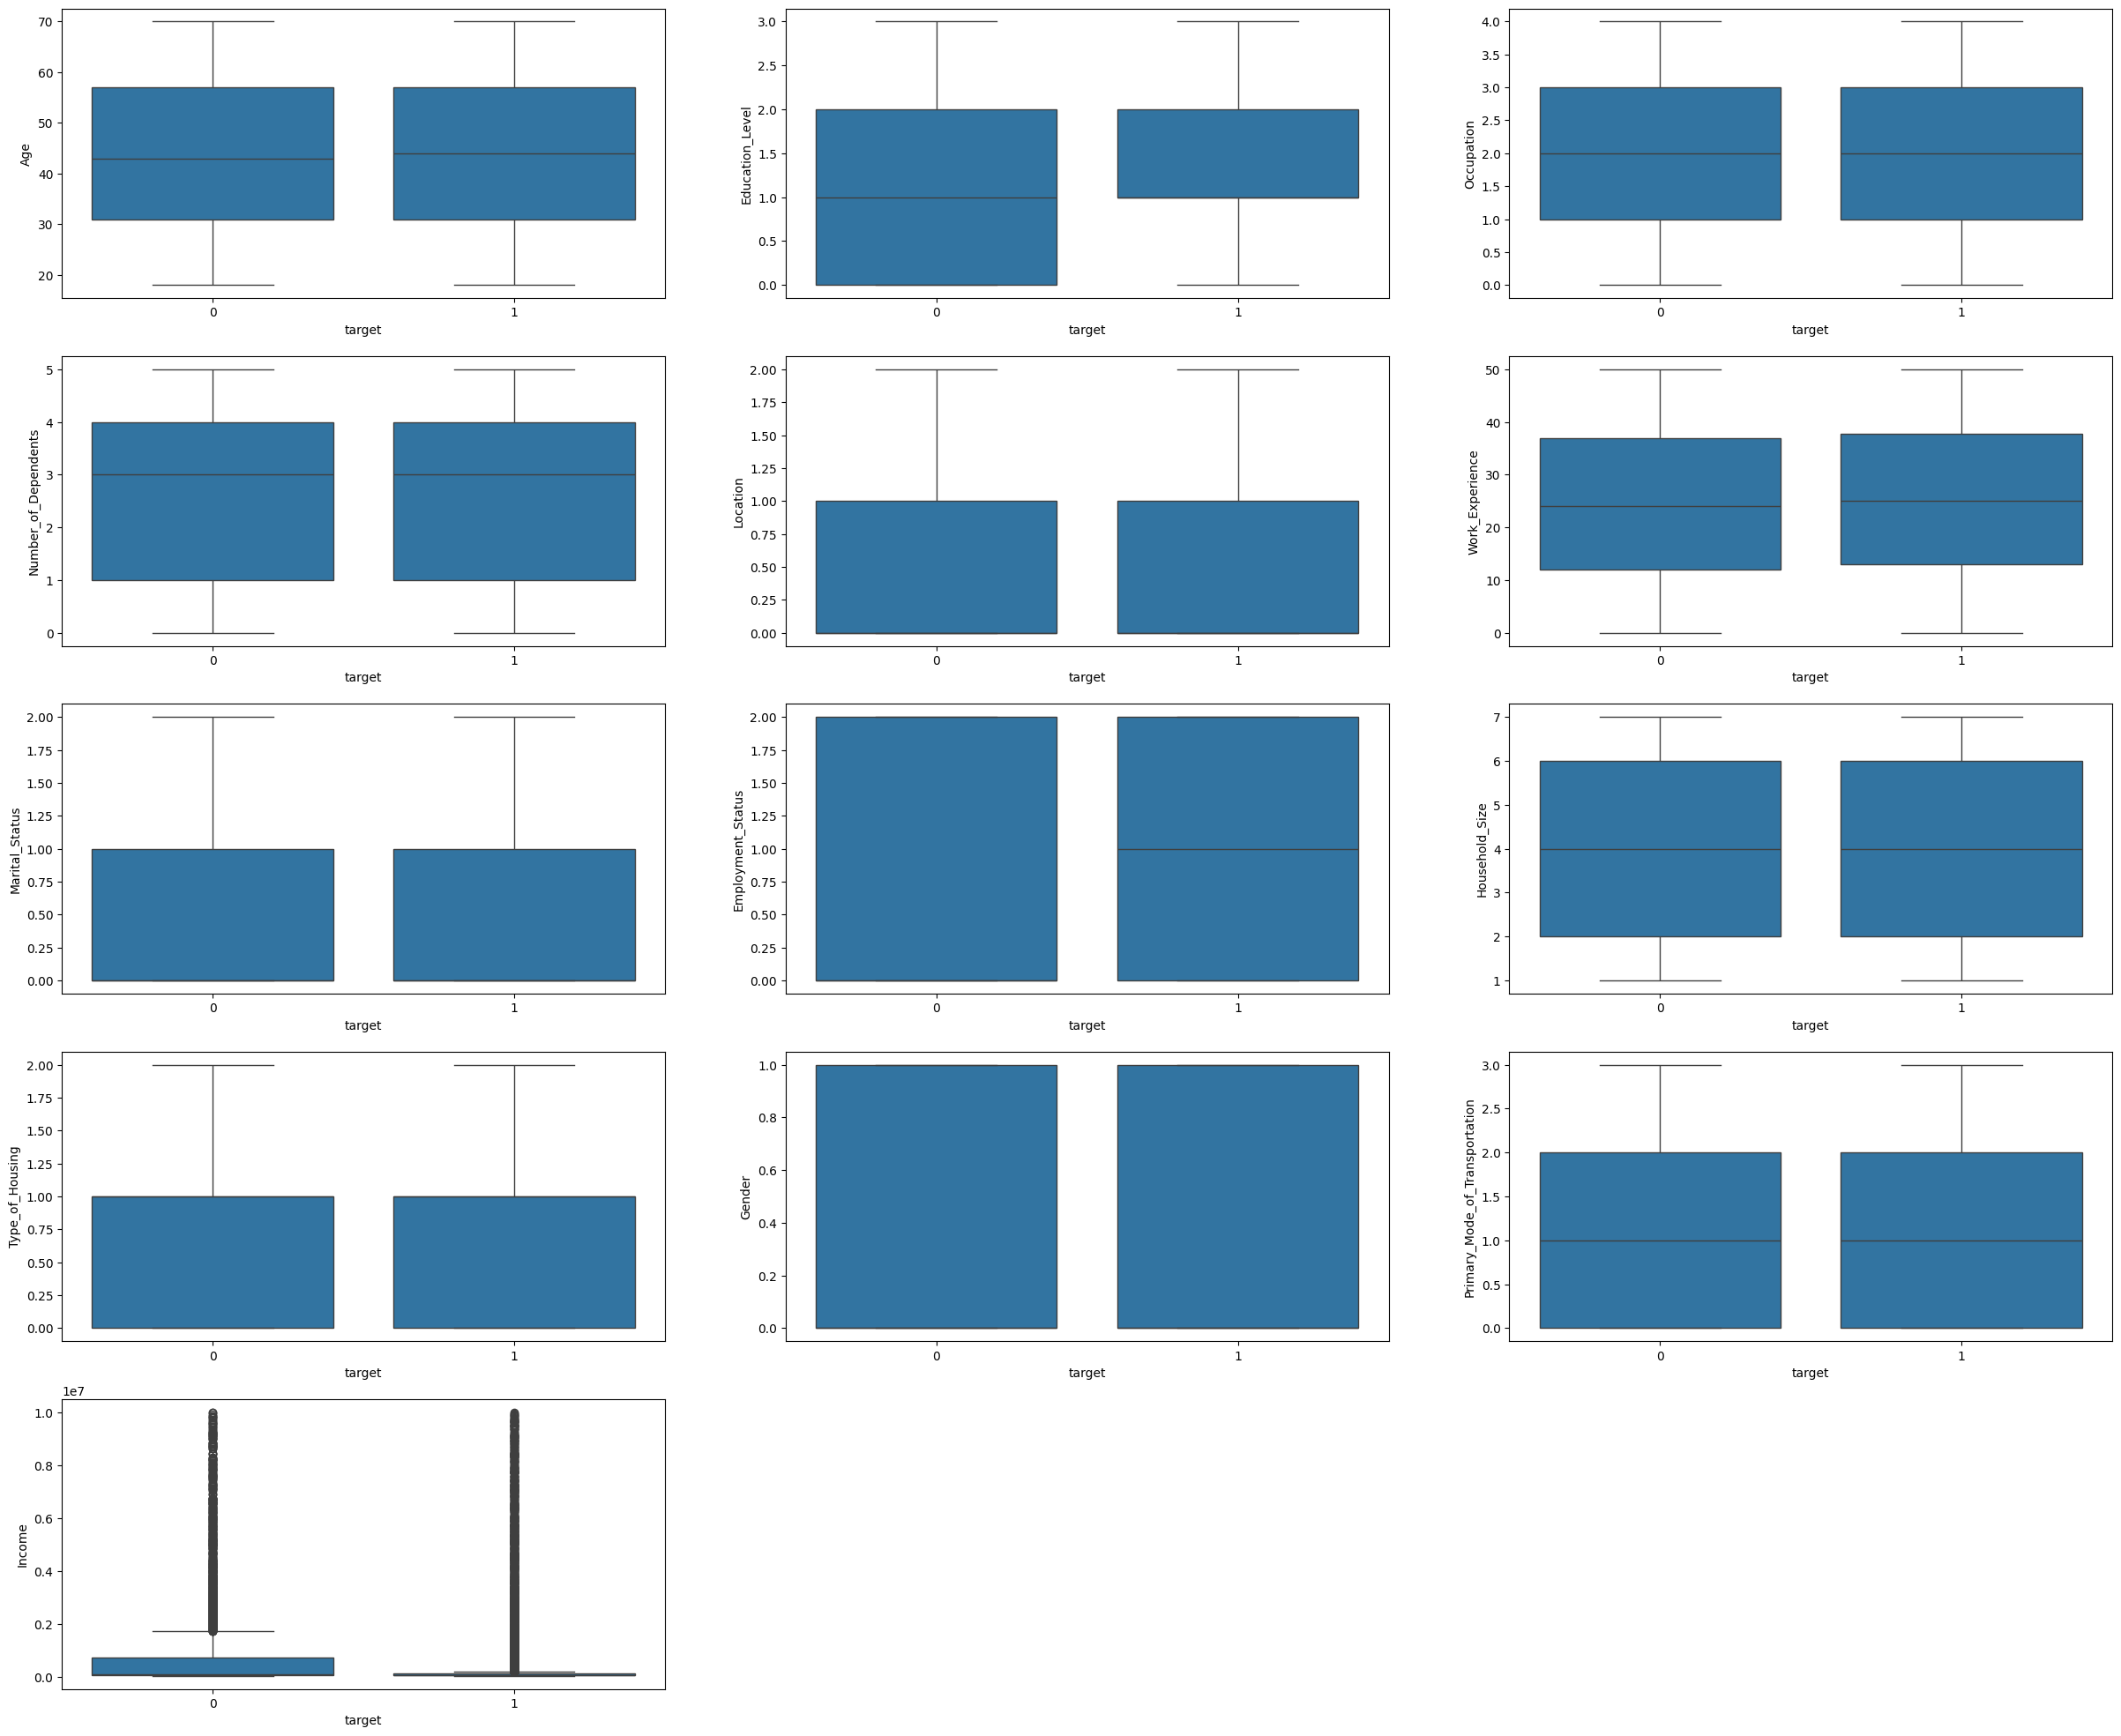

In [53]:
#Boxplots variables vs target variable
num_list=['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Type_of_Housing','Gender',
       'Primary_Mode_of_Transportation', 'Income']
fig=plt.figure(figsize=(30, 35))

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(7,3,i+1)
    sns.boxplot(x='target',y=column, data=df)


In [54]:
#ANOVA f-test for numerical features
x = df.loc[:, ['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Type_of_Housing','Gender',
       'Primary_Mode_of_Transportation', 'Income']]
y = df.loc[:, 'target']
print(x.head(5))
print(y.head(5))

   Age  Education_Level  Occupation  Number_of_Dependents  Location  \
0   56                0           0                     5         0   
1   69                2           1                     0         0   
2   46                1           0                     1         0   
3   32                2           4                     2         0   
4   60                1           1                     3         0   

   Work_Experience  Marital_Status  Employment_Status  Household_Size  \
0               21               0                  0               7   
1                4               1                  0               7   
2                1               1                  0               7   
3               32               0                  0               1   
4               15               0                  1               4   

   Type_of_Housing  Gender  Primary_Mode_of_Transportation  Income  
0                0       0                               1   7251

In [55]:
#importing library
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [56]:
#Getting f scores and p values for numerical variables
np.set_printoptions(suppress = True)
fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
print(bestFeatures.scores_)
print(bestFeatures.pvalues_)

[ 1.03560443  0.1309872   1.23123714  2.34632893  1.6457158   2.7010148
  0.16904887  0.00007835  1.92619461  1.21494974  0.24132547  0.58708785
 39.28477203]
[0.3088706  0.71741831 0.26719327 0.12561007 0.19957278 0.10031584
 0.6809673  0.99293779 0.1652063  0.27038058 0.62326121 0.44356553
 0.        ]


I am going to be dropping the features age, marital_status, employment_status, and gender because they had high p-values and low f-scores. A high p-value usually indicates that the feature is not significant and a low f-score means that there is a weaker relationship with the target variable.
Age: F-score = 0.1309872, p-value = 0.71741831
Marital_Status : F-score = 0.16904887, p-value = 0.6809673
Employment_Status: F-score = 0.00007835, p-value = 0.99293779
Gender: F-score = 0.24132547, p-value = 0.62326121

In [57]:
#Drop age, marital_status, employment_status, and gender columns due to high p-values and low f-scores

columns_to_drop = ['Age', 'Marital_Status', 'Employment_Status', 'Gender']
df = df.drop(columns=columns_to_drop)

print(df.head())


   Education_Level  Occupation  Number_of_Dependents  Location  \
0                0           0                     5         0   
1                2           1                     0         0   
2                1           0                     1         0   
3                2           4                     2         0   
4                1           1                     3         0   

   Work_Experience  Household_Size  target  Type_of_Housing  \
0               21               7       1                0   
1                4               7       1                0   
2                1               7       1                1   
3               32               1       1                0   
4               15               4       1                2   

   Primary_Mode_of_Transportation  Income  
0                               1   72510  
1                               3   75462  
2                               0   71748  
3                               0   74520  
4   

In [65]:
#Printing Column names for reference
print(df.columns)

Index(['Occupation', 'Number_of_Dependents', 'Location', 'Work_Experience',
       'Household_Size', 'target', 'Income'],
      dtype='object')


In [60]:
x = df.loc[:, ['Education_Level', 'Occupation', 'Number_of_Dependents', 'Location',
       'Work_Experience', 'Household_Size', 'Type_of_Housing',
       'Primary_Mode_of_Transportation', 'Income']]
y = df.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)

[8.24744304e-02 1.26421653e+00 2.72735833e+00 2.14388047e+00
 2.33240317e+01 1.95135915e+00 8.44684304e-01 5.61704704e-01
 1.58887978e+08]
[0.77397173 0.26085447 0.09864232 0.14313942 0.00000137 0.16244046
 0.35806048 0.45357421 0.        ]


I am going to be dropping education_level, type_of_housing, and primary_mode_of_transportation because they have higer p value and they have low chi-squared scores. The low chi-squared score show these features have a weaker associaion with the my target variable. The two values falling into their perspective ranges shows me that the aren't going to atribute significantly to my predictive model.
Education_Level: Chi-squared = 0.0824744304, p-value = 0.77397173
Type_of_Hosuing: Chi-squared = 0.844684304, p-value = 0.35806048
'Primary_Mode_of_Transportation': Chi-squared = 0.561704704, p-value = 0.45357421

In [61]:
#Drop education_level, type_of_housing, and primary_mode_of_transportation
columns_to_drop = ['Education_Level', 'Type_of_Housing', 'Primary_Mode_of_Transportation']
df = df.drop(columns=columns_to_drop)

print(df.head())

   Occupation  Number_of_Dependents  Location  Work_Experience  \
0           0                     5         0               21   
1           1                     0         0                4   
2           0                     1         0                1   
3           4                     2         0               32   
4           1                     3         0               15   

   Household_Size  target  Income  
0               7       1   72510  
1               7       1   75462  
2               7       1   71748  
3               1       1   74520  
4               4       1  640210  


In [62]:
#Printing Correlation table
print(df.corr())

                      Occupation  Number_of_Dependents  Location  \
Occupation              1.000000              0.017340 -0.012841   
Number_of_Dependents    0.017340              1.000000 -0.012374   
Location               -0.012841             -0.012374  1.000000   
Work_Experience         0.011761             -0.000708 -0.003490   
Household_Size          0.002490             -0.006419 -0.013547   
target                 -0.011097              0.015317 -0.012829   
Income                  0.002284              0.011413  0.044232   

                      Work_Experience  Household_Size    target    Income  
Occupation                   0.011761        0.002490 -0.011097  0.002284  
Number_of_Dependents        -0.000708       -0.006419  0.015317  0.011413  
Location                    -0.003490       -0.013547 -0.012829  0.044232  
Work_Experience              1.000000        0.006007  0.016434 -0.027541  
Household_Size               0.006007        1.000000  0.013879 -0.011356  

None of these variables have a strong enough correlation with each other to make feel one of them should be dropped.

In [69]:
# Normalize the data
x_final = df[['Occupation', 'Number_of_Dependents', 'Location', 'Work_Experience', 'Household_Size', 'Income']]
from sklearn.preprocessing import MinMaxScaler
nor_x= MinMaxScaler()
x_scaled= nor_x.fit_transform(x_final)

In [70]:
#Printing Normalized Data
print(x_scaled)

[[0.         1.         0.         0.42       1.         0.00416261]
 [0.25       0.         0.         0.08       1.         0.00445895]
 [0.         0.2        0.         0.02       1.         0.00408612]
 ...
 [0.5        0.6        0.         1.         0.5        0.26640253]
 [0.5        0.         0.         0.06       0.         0.00270149]
 [0.75       0.         1.         0.96       1.         0.11042885]]


Scaling is important to the KNN algorithm because it makes sure that all columns are contributing equally to the calculations for distance. Normalizing the data keeps one column of data from influencing the results more so than the others.

In [71]:
# Build a KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [78]:
#Setting up k to odd values 1-15
k_values = list(range(1, 16, 2))
print(k_values)

[1, 3, 5, 7, 9, 11, 13, 15]


In [79]:
k_accuracy_scores = []  # use this list to save the accuracy scores.

for k in k_values:   # use a loop to iterate the k values.
    from sklearn.model_selection import cross_val_score
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='accuracy')
    k_accuracy_scores.append(cv_scores.mean())

# use a DataFrame to save k-values vs. each accuracy score.
df_k_scores = pd.DataFrame(data = np.c_[k_values, k_accuracy_scores], columns = ['k', 'accuracy'])

In [80]:
print(df_k_scores)
#k = 11 has the hightest accuracy

      k  accuracy
0   1.0    0.5610
1   3.0    0.5641
2   5.0    0.5742
3   7.0    0.5764
4   9.0    0.5774
5  11.0    0.5861
6  13.0    0.5927
7  15.0    0.5929


In [81]:
#Using F1 for cross validation

k_f1_scores = []  # use this list to save the accuracy scores.

for k in k_values:   # use a loop to iterate the k values.
    from sklearn.model_selection import cross_val_score
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores=cross_val_score(knn, x_scaled, y, cv=10, scoring='f1')
    k_f1_scores.append(cv_scores.mean())


k_f1_scores = pd.DataFrame(data = np.c_[k_values, k_f1_scores], columns = ['k', 'f1_score'])

In [82]:
print(k_f1_scores)

      k  f1_score
0   1.0  0.642549
1   3.0  0.656299
2   5.0  0.673018
3   7.0  0.680254
4   9.0  0.685765
5  11.0  0.695955
6  13.0  0.703370
7  15.0  0.705859


k = 15 now has the highest accuracy

The best fit of these metrics would be the f1 score. The f1 score will account for false positives and negatives. It will balance precision and recall if the classes are imbalanced.